<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Importing libraries
</div>

In [267]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import lightgbm as lgb
import re

from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from kmodes.kprototypes import KPrototypes

<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Initial Analyses
</div>

In [2]:
df = pd.read_csv("C:\\Users\\henri\\Downloads\\ml_project1_data.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

**Transforming some variables** 

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [7]:
df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response', 'Complain', 'Marital_Status', 'Education','Kidhome','Teenhome']] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response', 'Complain', 'Marital_Status', 'Education','Kidhome','Teenhome']].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   category      
 6   Teenhome             2240 non-null   category      
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

#### **Assessing and creating new variables**

**Marital_Status**

In [9]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

**To simplify the "Marital_Status" variable, we’ll reduce it to two categories: Married and Single**

In [10]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Casado","Together":"Casado", "Single":"Solteiro", "Divorced":"Solteiro", "Widow":"Solteiro",'Alone':'Solteiro','Absurd':'Solteiro','YOLO':'Solteiro'})

C:\Users\henri\AppData\Local\Temp\ipykernel_23604\2899779438.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Casado","Together":"Casado", "Single":"Solteiro", "Divorced":"Solteiro", "Widow":"Solteiro",'Alone':'Solteiro','Absurd':'Solteiro','YOLO':'Solteiro'})


In [11]:
df['Marital_Status'].value_counts()

Marital_Status
Casado      1444
Solteiro     796
Name: count, dtype: int64

**Creating age and age ranges**

In [12]:
df['idade'] = 2024 - df["Year_Birth"]

**Plotting a BoxPlot of ages to evaluate possible outliers**

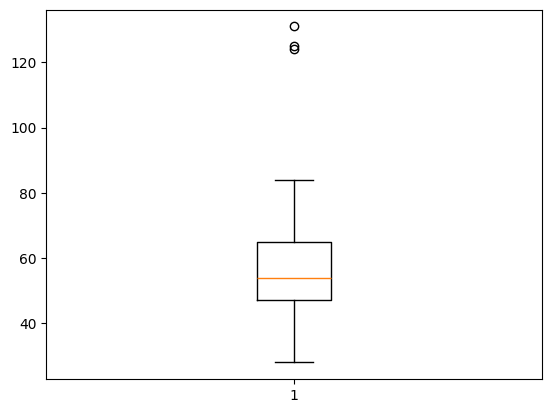

In [13]:
plt.boxplot(df['idade'])
plt.show()

**It is possible to observe the presence of outliers in the age variable; we will treat it to remove them**

In [14]:
df = df[df['idade'] <= 90]

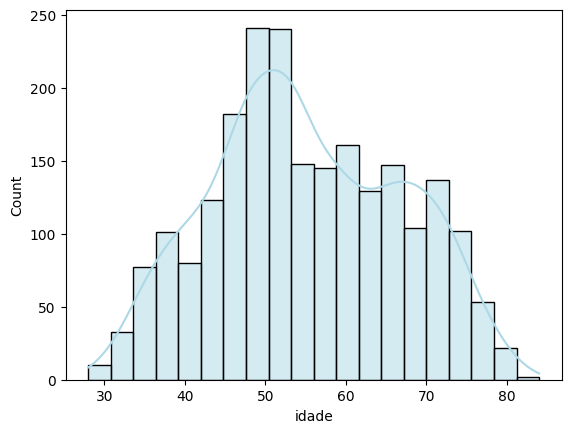

In [15]:
sns.histplot(df['idade'], bins=20, kde=True, color='lightblue')
plt.show()

**Creating age groups according to the UN definition of adults and the elderly**

In [16]:
df['idade'] = 2024 - df["Year_Birth"]
df['faixas_idade'] = pd.cut(df['idade'], [28,64,84], include_lowest=True )

<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Valores nulos
</div>

**Null values are often a challenge, which we can handle in two ways: the first is to remove observations with missing data, and the second is to use a technique to impute the missing values.**

**To get the most out of the dataset, we will use techniques to infer the value of the missing data. We’ll examine the distribution of the variable with missing values by other variables to impute the best possible value.**

**Column with missing data**

In [17]:
df.columns[df.isnull().any()].tolist()

['Income']

**Income analysis by education level**

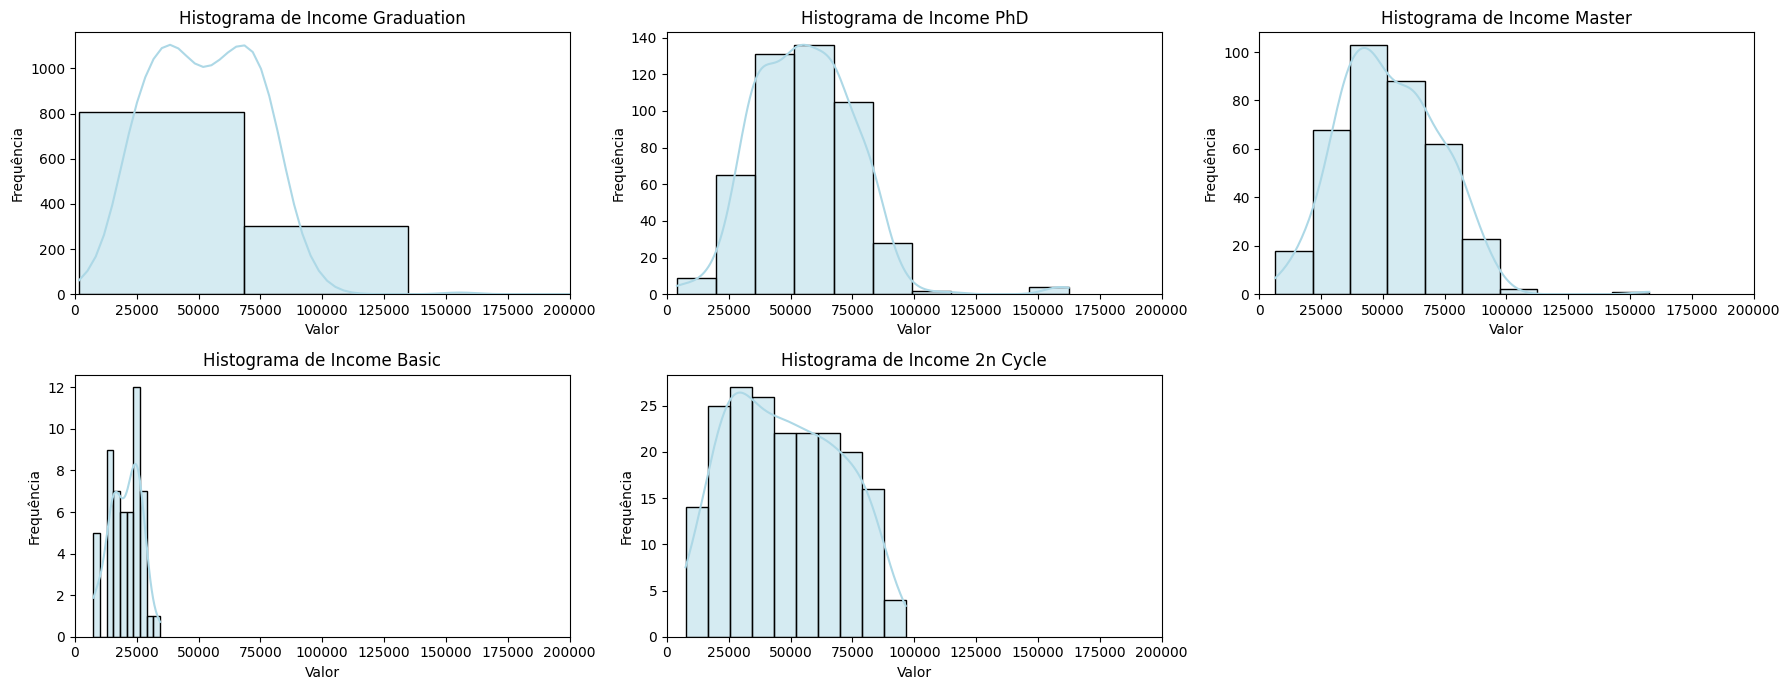

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(18, 7))
df_plot = []
titles = []

for i in df['Education'].unique():
    df_plot.append(df[df['Education'] == i]['Income'])
    titles.append(f'Histograma de Income {i}')

for j in range(len(df_plot)):
    row = j // 3
    col = j % 3
    sns.histplot(df_plot[j], bins=10, kde=True, color='lightblue', ax=axs[row, col])
    axs[row, col].set_title(titles[j])
    axs[row, col].set_xlabel('Valor')
    axs[row, col].set_ylabel('Frequência')
    axs[row, col].set_xlim(0, 200000)  # Define o limite do eixo x
# Remove eixos desnecessários
for idx in range(len(df_plot), 6):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()


**It’s noticeable that individuals with only basic education tend to have lower incomes than others, and those with a college degree have a slight tendency to earn more than others. These traits are important to decide which value we should impute for missing income data to ensure compatibility with individual characteristics.**

**Despite similarities between income for those who completed only basic or secondary education, we won’t group them into a single class.**

**Income analysis by age range**

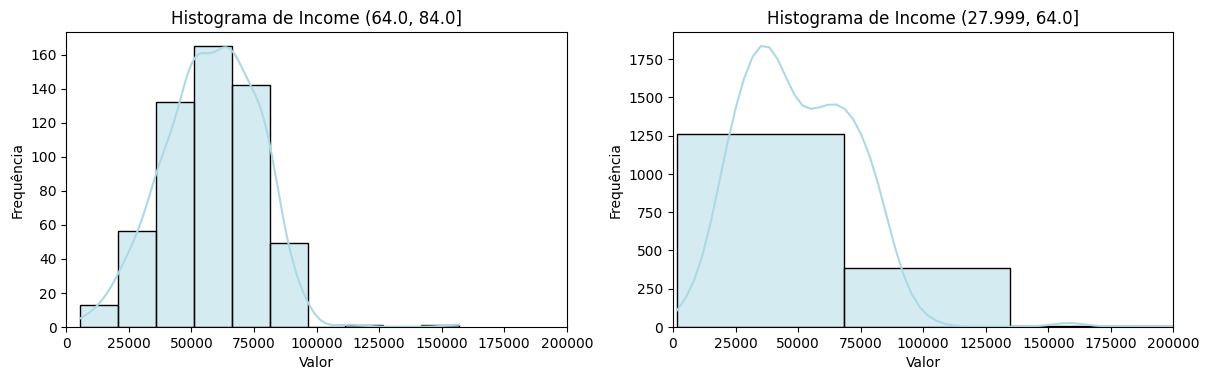

In [19]:
fig, axs = plt.subplots(2,3, figsize = (18,7))
df_plot = []
titles = []

for i in df['faixas_idade'].unique():
    df_plot.append(df[df['faixas_idade'] == i]['Income'])
    titles.append(f'Histograma de Income {i}')

for j in range(len(df_plot)):
   row = j // 3
   col = j % 3
   sns.histplot(df_plot[j], bins=10, kde=True, color='lightblue', ax=axs[row, col])
   axs[row, col].set_title(titles[j])
   axs[row, col].set_xlabel('Valor')
   axs[row, col].set_ylabel('Frequência')
   axs[row, col].set_xlim(0, 200000)  # Define o limite do eixo x

for idx in range(len(df_plot), 6):
   fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

**As with education level, age seems to affect income: people between 28 and 40 years appear to earn less than others.**

**To arrive at a realistic income value for each individual, we’ll combine education level and age range to infer missing income values based on these characteristics.**

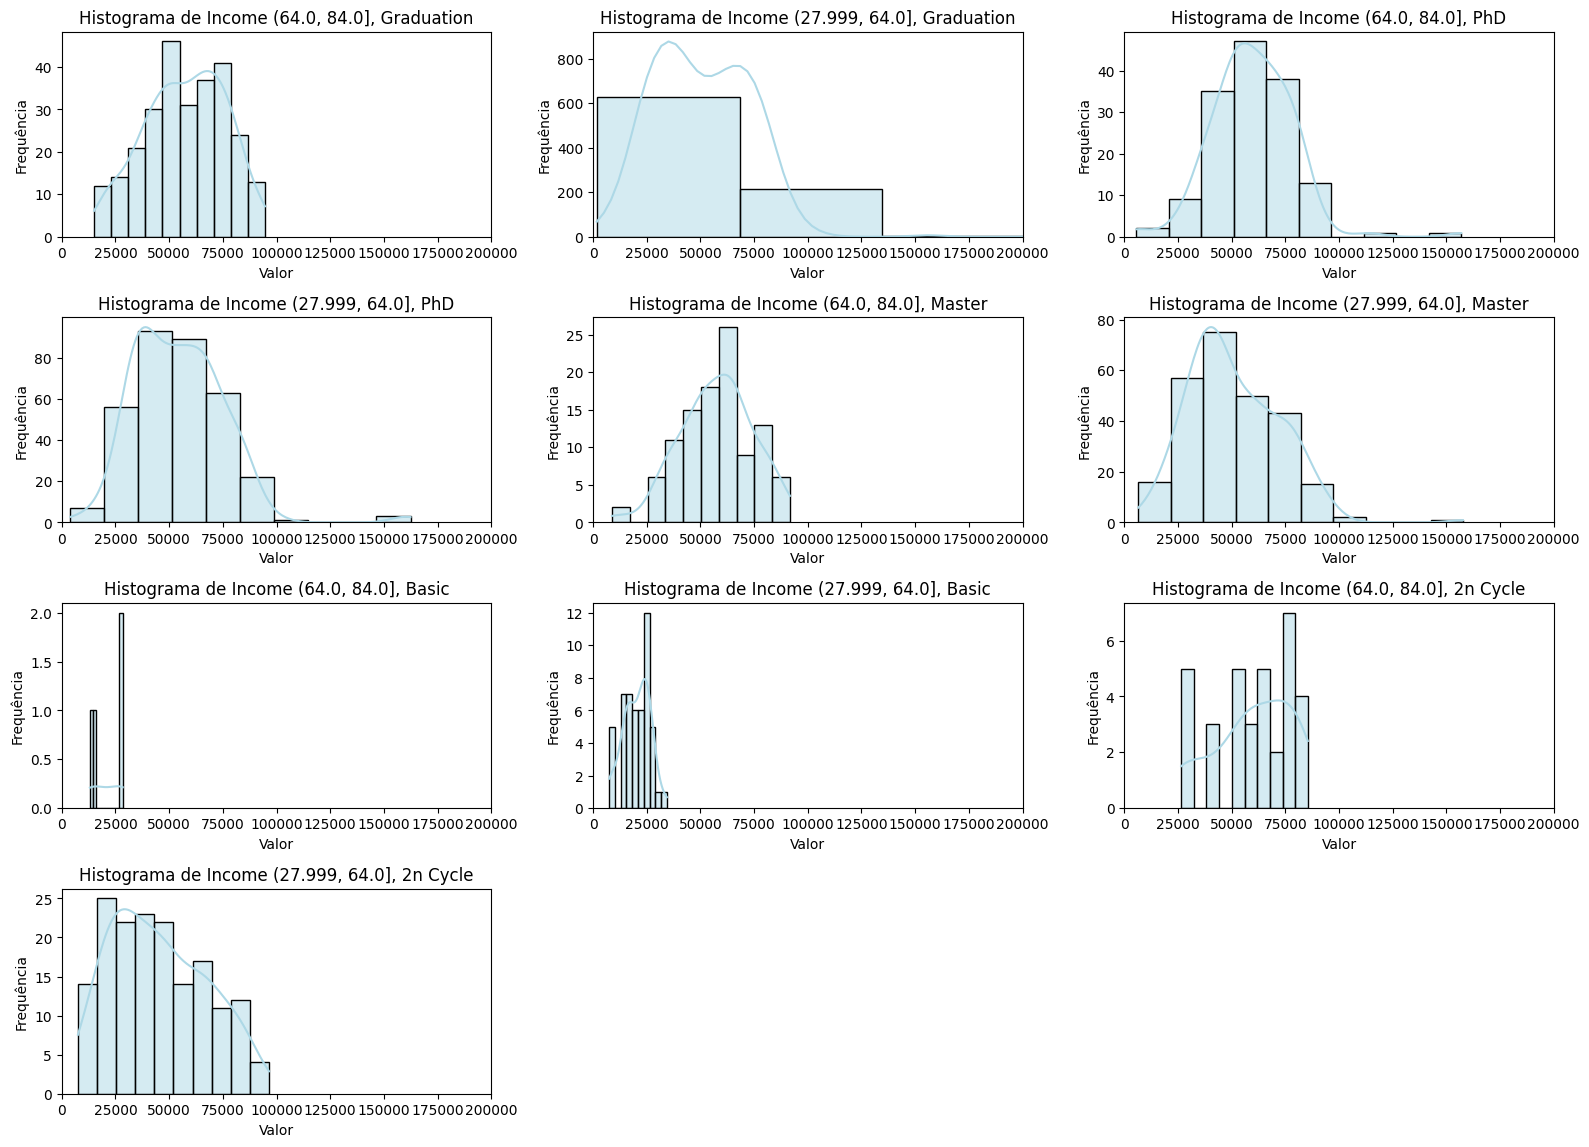

In [20]:
fig, axs = plt.subplots(5, 3, figsize=(16, 14))
df_plot = []
titles = []

for a in df['Education'].unique():
    for i in df['faixas_idade'].unique():
        df_plot.append(df[(df['faixas_idade'] == i) & (df['Education'] == a)]['Income'])
        titles.append(f'Histograma de Income {i}, {a}')

for j in range(len(df_plot)):
    row = j // 3
    col = j % 3
    sns.histplot(df_plot[j], bins=10, kde=True, color='lightblue', ax=axs[row, col])
    axs[row, col].set_title(titles[j])
    axs[row, col].set_xlabel('Valor')
    axs[row, col].set_ylabel('Frequência')
    axs[row, col].set_xlim(0, 200000)  # Define o limite do eixo x

# Remove eixos desnecessários
for idx in range(len(df_plot), 15):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

**Although subtle, there are differences in incomes segmented by age and education; this small distinction is what we want to capture in the analysis**

In [21]:
df_nulos = df[df['Income'].isnull()]
df_nulos[['Education', 'faixas_idade']].value_counts()

Education   faixas_idade  
Graduation  (27.999, 64.0]    7
            (64.0, 84.0]      4
2n Cycle    (27.999, 64.0]    3
Master      (27.999, 64.0]    3
PhD         (27.999, 64.0]    3
Master      (64.0, 84.0]      2
PhD         (64.0, 84.0]      2
Name: count, dtype: int64

**Despite limited differences among education and age groups, we’ll use these two variables to help infer the "Income" variable as accurately as possible.**

**Filling in missing values with the mean of each class**

In [22]:
df_media = df.groupby(['Education', 'faixas_idade'])['Income'].mean().reset_index()
income_media = df_media.rename(columns={'Income': 'Income_media'})
income_media

C:\Users\henri\AppData\Local\Temp\ipykernel_23604\3407901546.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_media = df.groupby(['Education', 'faixas_idade'])['Income'].mean().reset_index()


,Education,faixas_idade,Income_media
0,2n Cycle,"(27.999, 64.0]",45081.030488
1,2n Cycle,"(64.0, 84.0]",59897.852941
2,Basic,"(27.999, 64.0]",20260.240000
3,Basic,"(64.0, 84.0]",20881.500000
4,Graduation,"(27.999, 64.0]",51214.547816
5,Graduation,"(64.0, 84.0]",57461.765799
6,Master,"(27.999, 64.0]",50991.343629
7,Master,"(64.0, 84.0]",57623.981132
8,PhD,"(27.999, 64.0]",54477.742515
9,PhD,"(64.0, 84.0]",59772.589041


In [23]:
df = df.merge(income_media, on=['Education', 'faixas_idade'], how='left')
df['Income'] = df['Income'].fillna(df['Income_media'])

df = df.drop(columns=['Income_media'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,idade,faixas_idade
0,5524,1957,Graduation,Solteiro,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,"(64.0, 84.0]"
1,2174,1954,Graduation,Solteiro,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,"(64.0, 84.0]"
2,4141,1965,Graduation,Casado,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,"(27.999, 64.0]"
3,6182,1984,Graduation,Casado,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,"(27.999, 64.0]"
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,"(27.999, 64.0]"


**Checking for any remaining missing values**

In [24]:
df.isnull().any().sum()

0

<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Exploratory Analyses
</div>

**Here, we’ll conduct some analyses to explore the dataset and understand variable behaviors.**

**Purchase proportion relative to other variables**

C:\Users\henri\AppData\Local\Temp\ipykernel_23604\1127434788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette='viridis')


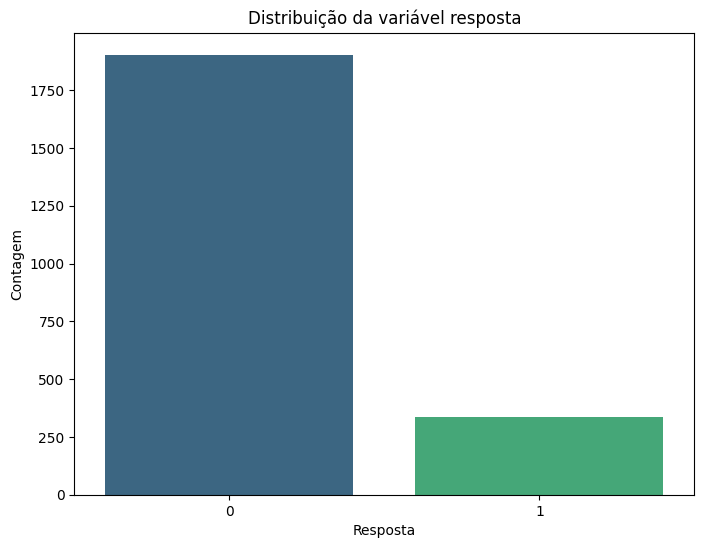

In [249]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=df, palette='viridis')
plt.title('Distribuição da variável resposta')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

**This first graph provides valuable information showing that the dataset is imbalanced between people who bought in the campaign and those who did not.**

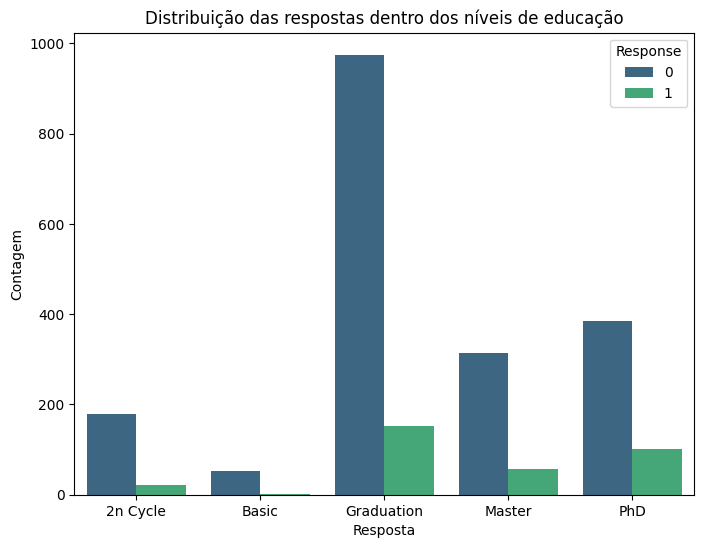

In [250]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Response', data=df, palette='viridis')
plt.title('Distribuição das respostas dentro dos níveis de educação')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

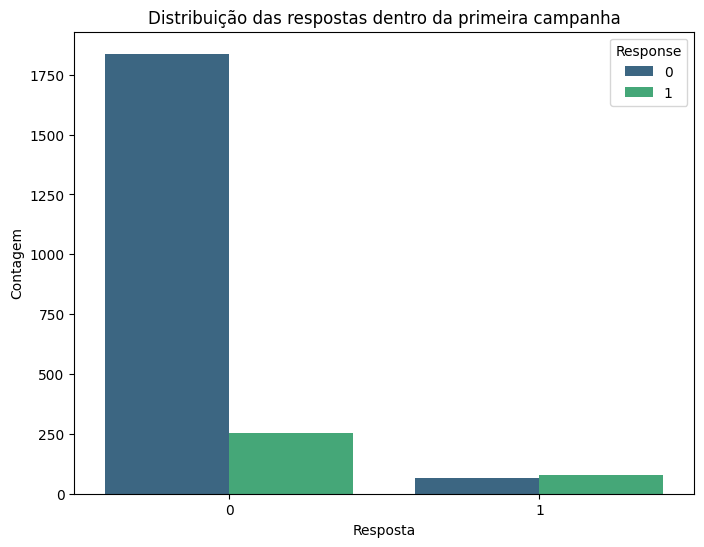

In [252]:
plt.figure(figsize=(8, 6))
sns.countplot(x='AcceptedCmp1', hue='Response', data=df, palette='viridis')
plt.title('Distribuição das respostas dentro da primeira campanha')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

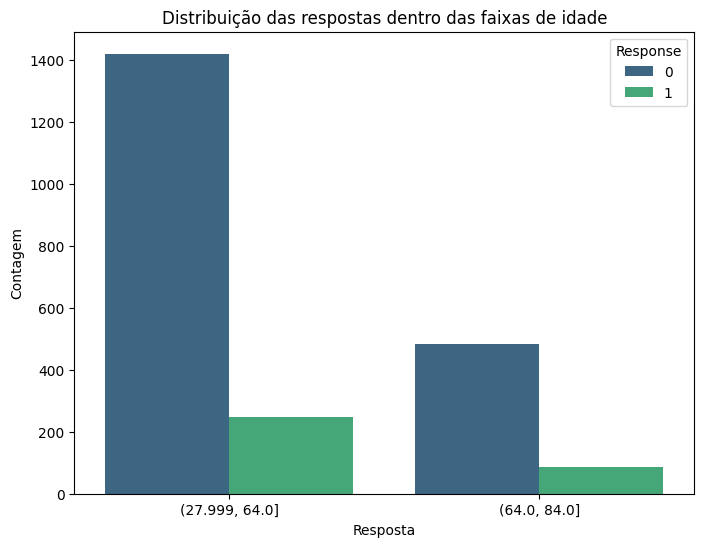

In [253]:
plt.figure(figsize=(8, 6))
sns.countplot(x='faixas_idade', hue='Response', data=df, palette='viridis')
plt.title('Distribuição das respostas dentro das faixas de idade')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

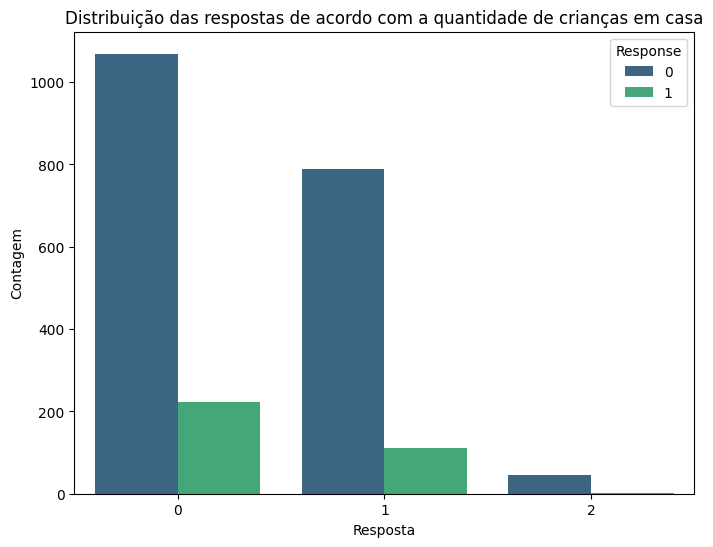

In [254]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Kidhome', hue='Response', data=df, palette='viridis')
plt.title('Distribuição das respostas de acordo com a quantidade de crianças em casa')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

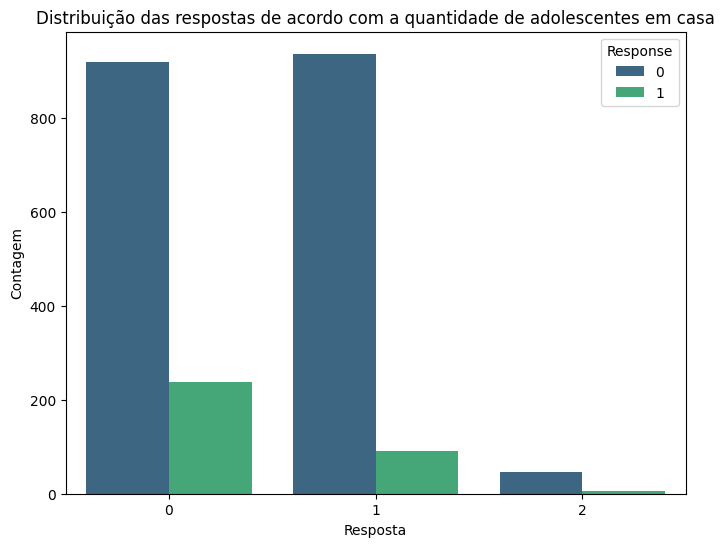

In [268]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Teenhome', hue='Response', data=df, palette='viridis')
plt.title('Distribuição das respostas de acordo com a quantidade de adolescentes em casa')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

**Those without children or teens at home appear more likely to buy in this campaign.**

<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

#### **Exploring Numerical Variables**

**Histogram of numerical variables**

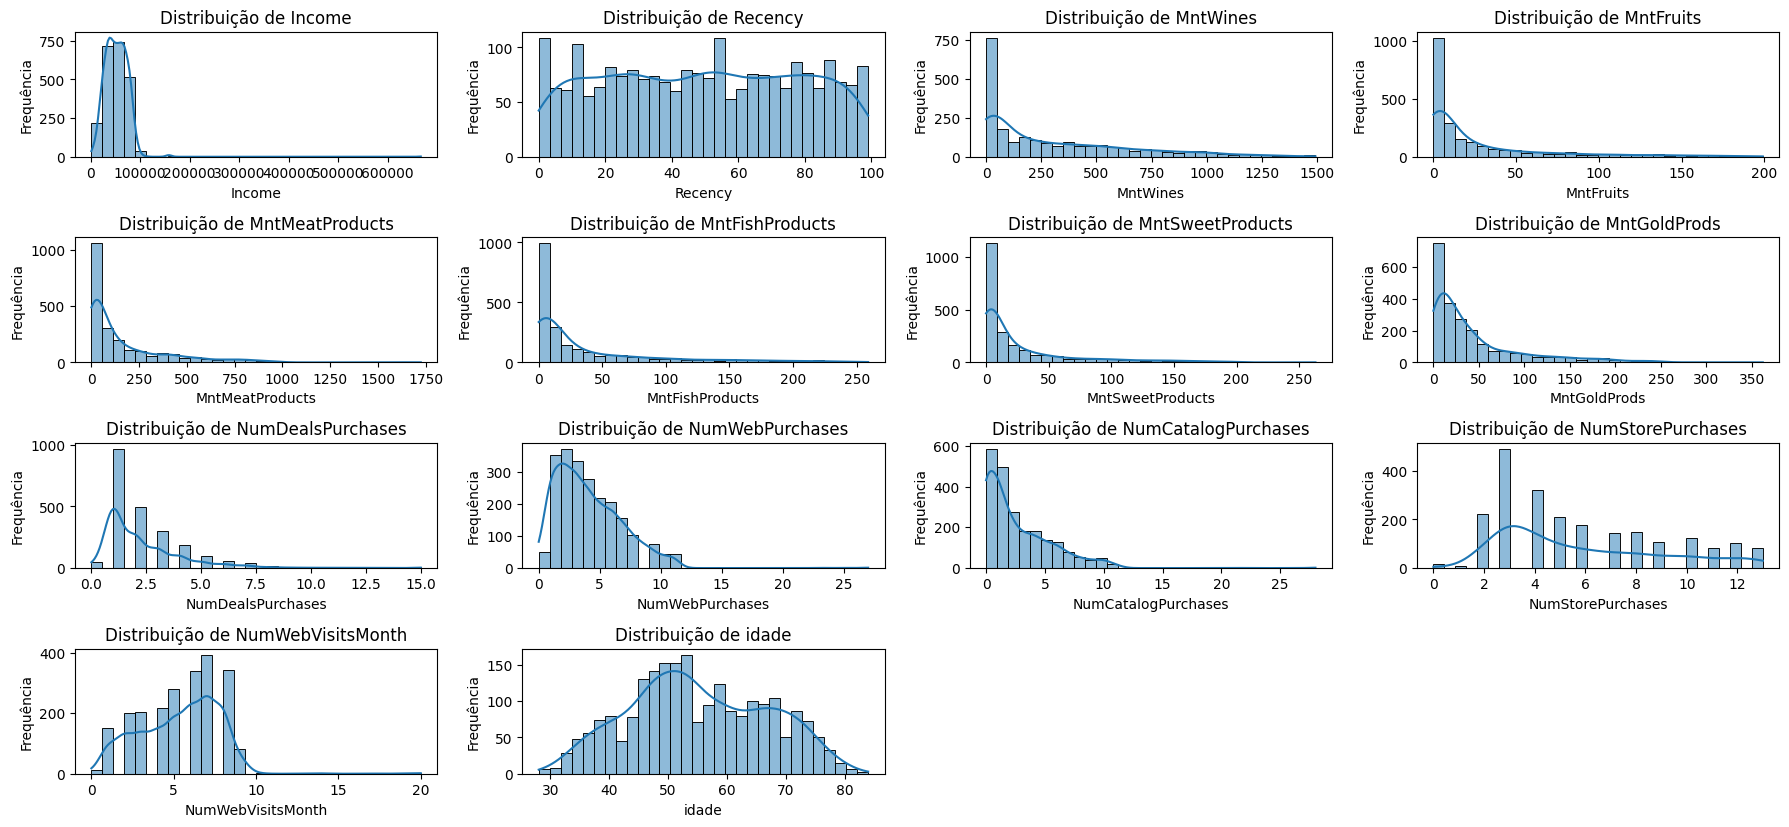

In [208]:
# Histograma para variáveis numéricas
num_features = [ 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'idade']
plt.figure(figsize=(18, 10))
for i, feature in enumerate(num_features):
   plt.subplot(5, 4, i + 1)
   sns.histplot(df[feature], kde=True, bins=30)
   plt.title(f'Distribuição de {feature}')
   plt.xlabel(feature)
   plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

**Correlation of numerical variables**

In [263]:
num_features_2 = ['Year_Birth', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'idade']

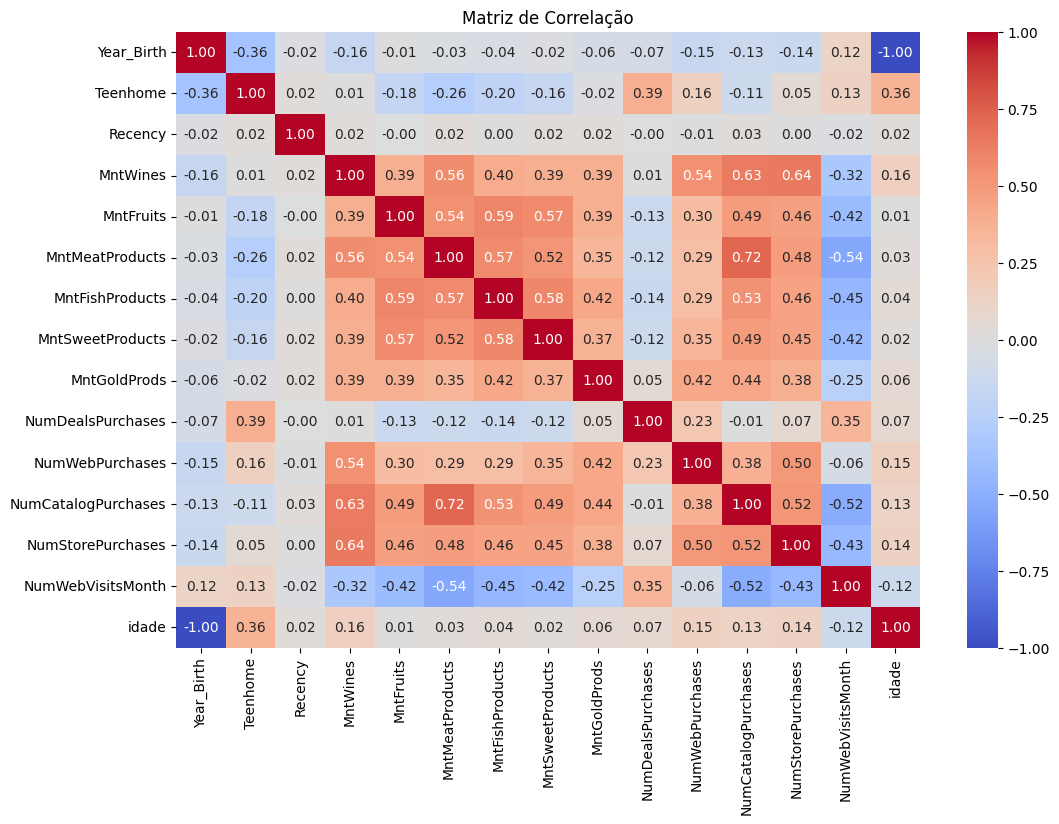

In [264]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_features_2].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [266]:
similar_variables = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            similar_variables.append((correlation_matrix.columns[i], correlation_matrix.columns[j], round(corr_value, 2)))

# Ordenar a lista pela magnitude da correlação em ordem decrescente
similar_variables_sorted = sorted(similar_variables, key=lambda x: abs(x[2]), reverse=True)

# Exibir as variáveis semelhantes ordenadas
print('Variáveis com comportamentos semelhantes (ordenadas pela correlação):')
for var1, var2, corr in similar_variables_sorted:
    print(f'- {var1} e {var2}: Correlação = {corr}')

Variáveis com comportamentos semelhantes (ordenadas pela correlação):
- Year_Birth e idade: Correlação = -1.0
- MntMeatProducts e NumCatalogPurchases: Correlação = 0.72
- MntWines e NumStorePurchases: Correlação = 0.64
- MntWines e NumCatalogPurchases: Correlação = 0.63
- MntFruits e MntFishProducts: Correlação = 0.59
- MntFishProducts e MntSweetProducts: Correlação = 0.58
- MntFruits e MntSweetProducts: Correlação = 0.57
- MntMeatProducts e MntFishProducts: Correlação = 0.57
- MntWines e MntMeatProducts: Correlação = 0.56
- MntWines e NumWebPurchases: Correlação = 0.54
- MntFruits e MntMeatProducts: Correlação = 0.54
- MntMeatProducts e NumWebVisitsMonth: Correlação = -0.54
- MntFishProducts e NumCatalogPurchases: Correlação = 0.53
- MntMeatProducts e MntSweetProducts: Correlação = 0.52
- NumCatalogPurchases e NumStorePurchases: Correlação = 0.52
- NumCatalogPurchases e NumWebVisitsMonth: Correlação = -0.52
- NumWebPurchases e NumStorePurchases: Correlação = 0.5


<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

#### **Exploring Categorical Variables**

**Contingency tables for categorical variables**

In [119]:
categorias = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'faixas_idade', 'Kidhome','Teenhome']

In [120]:
for i in categorias:
    print('\n')
    print(f'tabela de {i}')
    print(pd.crosstab(df[i], df['Response']))
    print('\n')
    print('======================================================')



tabela de Education
Response      0    1
Education           
2n Cycle    179   22
Basic        52    2
Graduation  975  152
Master      313   57
PhD         384  101




tabela de Marital_Status
Response           0    1
Marital_Status           
Solteiro         618  176
Casado          1285  158




tabela de AcceptedCmp3
Response         0    1
AcceptedCmp3           
0             1817  257
1               86   77




tabela de AcceptedCmp4
Response         0    1
AcceptedCmp4           
0             1798  272
1              105   62




tabela de AcceptedCmp5
Response         0    1
AcceptedCmp5           
0             1833  242
1               70   92




tabela de AcceptedCmp1
Response         0    1
AcceptedCmp1           
0             1838  255
1               65   79




tabela de AcceptedCmp2
Response         0    1
AcceptedCmp2           
0             1893  314
1               10   20




tabela de Complain
Response     0    1
Complain           
0         1886  331


In [209]:
stats = {}
for coluna in categorias:
    counts = df[coluna].value_counts()
    proportions = df[coluna].value_counts(normalize=True)
    mode = df[coluna].mode()[0]
    stats[coluna] = {
        'Counts': counts,
        'Proportions': proportions,
        'Mode': mode
    }

for col, stats in stats.items():
    print('\n')
    print(f'\033[1mEstatísticas para {col}:\033[0m')
    print('\033[1mContagens:\033[0m')
    print(stats['Counts'])
    print('\033[1mProporções:\033[0m')
    print(stats['Proportions'])
    print(f'\033[1mModa:\033[0m')
    print(stats['Mode'])
    print('\n')
    print('======================================================')



Estatísticas para Education:
Contagens:
Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64
Proporções:
Education
Graduation    0.503800
PhD           0.216808
Master        0.165400
2n Cycle      0.089852
Basic         0.024139
Name: proportion, dtype: float64
Moda:
Graduation




Estatísticas para Marital_Status:
Contagens:
Marital_Status
Casado      1443
Solteiro     794
Name: count, dtype: int64
Proporções:
Marital_Status
Casado      0.64506
Solteiro    0.35494
Name: proportion, dtype: float64
Moda:
Casado




Estatísticas para AcceptedCmp3:
Contagens:
AcceptedCmp3
0    2074
1     163
Name: count, dtype: int64
Proporções:
AcceptedCmp3
0    0.927135
1    0.072865
Name: proportion, dtype: float64
Moda:
0




Estatísticas para AcceptedCmp4:
Contagens:
AcceptedCmp4
0    2070
1     167
Name: count, dtype: int64
Proporções:
AcceptedCmp4
0    0.925346
1    0.074654
Name: proportion, dtype: float64
Moda:
0





<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Clustering
</div>

**To understand customer profiles, we’ll use a technique called K-Prototypes, which clusters data using both categorical and numerical variables.**

In [25]:
df = df.drop('Dt_Customer', axis=1)

In [26]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

numerical_features.remove('ID')
numerical_features.remove('Z_CostContact')
numerical_features.remove('Z_Revenue')
numerical_features.remove('Year_Birth')

df_numerical = df[numerical_features]


In [27]:
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)


In [28]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_indices = [df.columns.get_loc(col) for col in categorical_columns]

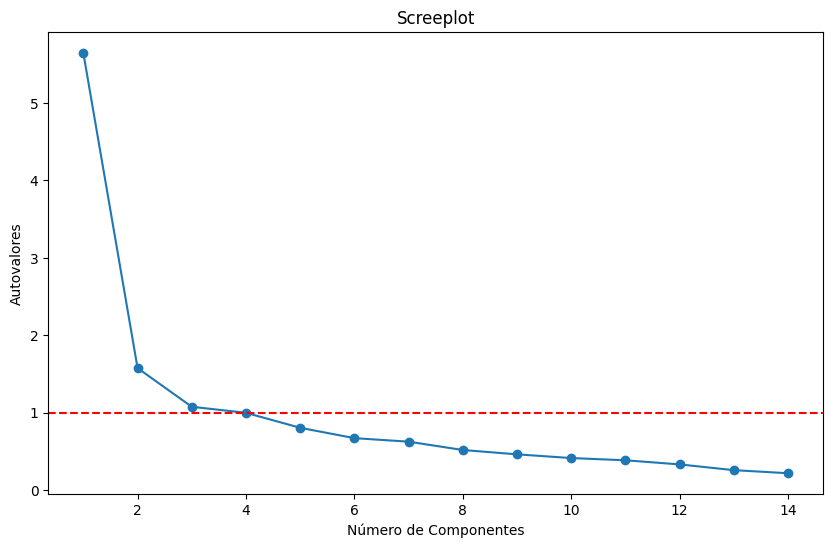

Autovalores: [5.64275445 1.57699915 1.0781901  0.99998212 0.80680116 0.67292618
 0.62747927 0.52007189 0.46393004 0.41593518 0.38722802 0.3340357
 0.25982462 0.22010329]


In [29]:
pca = PCA()
pca.fit(df_numerical_scaled)

# Calcular os autovalores
eigenvalues = pca.explained_variance_

# Plotar o Screeplot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Autovalores')
plt.title('Screeplot')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# Exibir os autovalores
print("Autovalores:", eigenvalues)

**By Kaiser’s criterion, we should select the number of clusters with eigenvalues greater than 1. Given the proximity of the 4th eigenvalue to 1, we’ll test with four clusters.**

In [30]:
kproto = KPrototypes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = kproto.fit_predict(df, categorical=categorical_indices)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 260, ncost: 492000990184.8876
Run: 1, iteration: 2/100, moves: 153, ncost: 488585549518.82153
Run: 1, iteration: 3/100, moves: 80, ncost: 487582719567.7902
Run: 1, iteration: 4/100, moves: 36, ncost: 487275706689.04095
Run: 1, iteration: 5/100, moves: 27, ncost: 487123353430.4078
Run: 1, iteration: 6/100, moves: 12, ncost: 487091240787.48816
Run: 1, iteration: 7/100, moves: 8, ncost: 487074609140.63837
Run: 1, iteration: 8/100, moves: 2, ncost: 487073375675.8645
Run: 1, iteration: 9/100, moves: 0, ncost: 487073375675.8645
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 297, ncost: 515161318791.0643
Run: 2, iteration: 2/100, moves: 234, ncost: 504365812759.3504
Run: 2, iteration: 3/100, moves: 207, ncost: 496665602031.201
Run: 2, iteration: 4/100, moves: 140, ncost: 493199134568.9145
Run: 2, iteration: 5/100, mo

In [31]:
df['cluster'] = clusters
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,idade,faixas_idade,cluster
0,5524,1957,Graduation,Solteiro,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,67,"(64.0, 84.0]",3
1,2174,1954,Graduation,Solteiro,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,70,"(64.0, 84.0]",3
2,4141,1965,Graduation,Casado,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,59,"(27.999, 64.0]",2
3,6182,1984,Graduation,Casado,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,40,"(27.999, 64.0]",0
4,5324,1981,PhD,Casado,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,43,"(27.999, 64.0]",3


In [32]:
cluster_means = df.groupby('cluster')[numerical_features].mean()

cluster_means


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,idade
cluster,,,,,,,,,,,,,,
0,28126.551582,48.375516,29.894085,5.903714,25.352132,9.071527,6.017882,17.532325,2.144429,2.144429,0.526823,3.071527,6.911967,50.811554
1,221604.500000,48.625000,26.500000,4.500000,621.875000,4.250000,1.250000,3.750000,4.250000,0.500000,9.875000,0.750000,1.125000,51.500000
2,75532.955182,49.077031,623.023810,56.598039,386.256303,81.519608,59.452381,71.056022,1.662465,5.529412,5.320728,8.497199,3.302521,56.610644
3,51678.906584,49.807107,270.626904,17.802030,94.162437,24.244924,17.409898,44.223350,3.077411,4.609137,2.151015,5.908629,5.719543,57.719543


In [33]:
cluster_modes = df.groupby('cluster')[categorical_columns].agg(lambda x: x.mode().iloc[0]).reset_index()

cluster_modes

,cluster,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,faixas_idade
0,0,Graduation,Casado,1,0,0,0,0,0,0,0,0,"(27.999, 64.0]"
1,1,PhD,Casado,0,0,0,0,0,0,0,0,0,"(27.999, 64.0]"
2,2,Graduation,Casado,0,0,0,0,0,0,0,0,0,"(27.999, 64.0]"
3,3,Graduation,Casado,0,1,0,0,0,0,0,0,0,"(27.999, 64.0]"


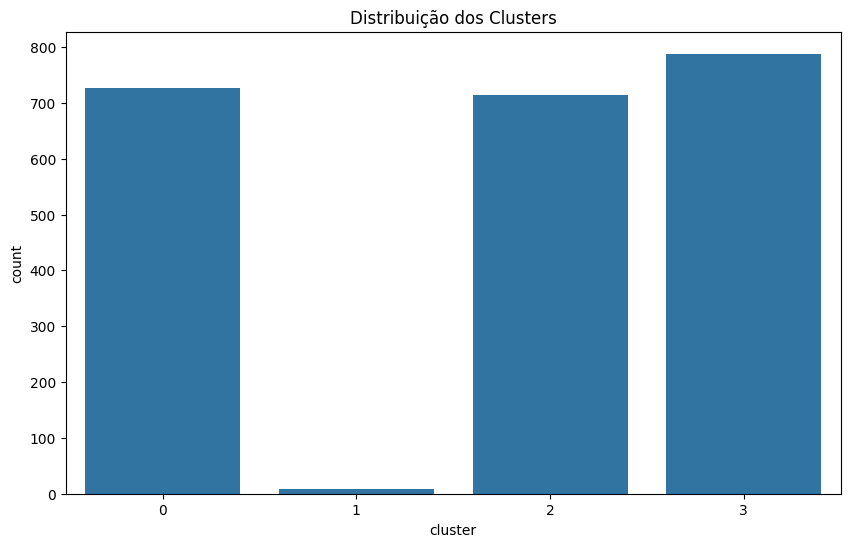

In [34]:
# Visualizar a distribuição dos clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribuição dos Clusters')
plt.show()


**As almost no records entered the first cluster, we’ll use only three clusters.**

In [35]:
kproto = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = kproto.fit_predict(df, categorical=categorical_indices)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 727, ncost: 556806013673.3379
Run: 1, iteration: 2/100, moves: 128, ncost: 554272280639.5427
Run: 1, iteration: 3/100, moves: 28, ncost: 553906356079.0864
Run: 1, iteration: 4/100, moves: 35, ncost: 553446749002.4822
Run: 1, iteration: 5/100, moves: 35, ncost: 553056208877.5602
Run: 1, iteration: 6/100, moves: 14, ncost: 552992539094.3722
Run: 1, iteration: 7/100, moves: 12, ncost: 552943463985.3359
Run: 1, iteration: 8/100, moves: 8, ncost: 552915237375.0942
Run: 1, iteration: 9/100, moves: 6, ncost: 552905132069.1542
Run: 1, iteration: 10/100, moves: 2, ncost: 552904234672.6611
Run: 1, iteration: 11/100, moves: 0, ncost: 552904234672.6611
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 285, ncost: 554043561034.5052
Run: 2, iteration: 2/100, moves: 67, ncost: 553160544724.0989
Run: 2, iteration: 3/100, moves: 

In [36]:
df['cluster'] = clusters
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,idade,faixas_idade,cluster
0,5524,1957,Graduation,Solteiro,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,67,"(64.0, 84.0]",2
1,2174,1954,Graduation,Solteiro,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,70,"(64.0, 84.0]",2
2,4141,1965,Graduation,Casado,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,59,"(27.999, 64.0]",1
3,6182,1984,Graduation,Casado,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,40,"(27.999, 64.0]",0
4,5324,1981,PhD,Casado,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,43,"(27.999, 64.0]",2


**Understanding cluster behavior**

In [37]:
cluster_means = df.groupby('cluster')[numerical_features].mean()

cluster_means


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,idade
cluster,,,,,,,,,,,,,,
0,28997.423816,48.457106,33.847631,6.135723,26.174136,9.298335,6.188220,18.176697,2.174136,2.211268,0.551857,3.113956,6.888604,51.071703
1,79462.274380,48.966942,632.791736,59.661157,421.771901,86.573554,63.585124,71.894215,1.510744,5.373554,5.661157,8.380165,3.034711,56.150413
2,54233.470491,49.796710,318.171563,21.010576,114.898942,28.554642,20.271445,47.786134,3.047004,4.894242,2.467685,6.415981,5.502938,58.045828


In [38]:
cluster_modes = df.groupby('cluster')[categorical_columns].agg(lambda x: x.mode().iloc[0]).reset_index()

cluster_modes

,cluster,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,faixas_idade
0,0,Graduation,Casado,1,0,0,0,0,0,0,0,0,"(27.999, 64.0]"
1,1,Graduation,Casado,0,0,0,0,0,0,0,0,0,"(27.999, 64.0]"
2,2,Graduation,Casado,0,1,0,0,0,0,0,0,0,"(27.999, 64.0]"


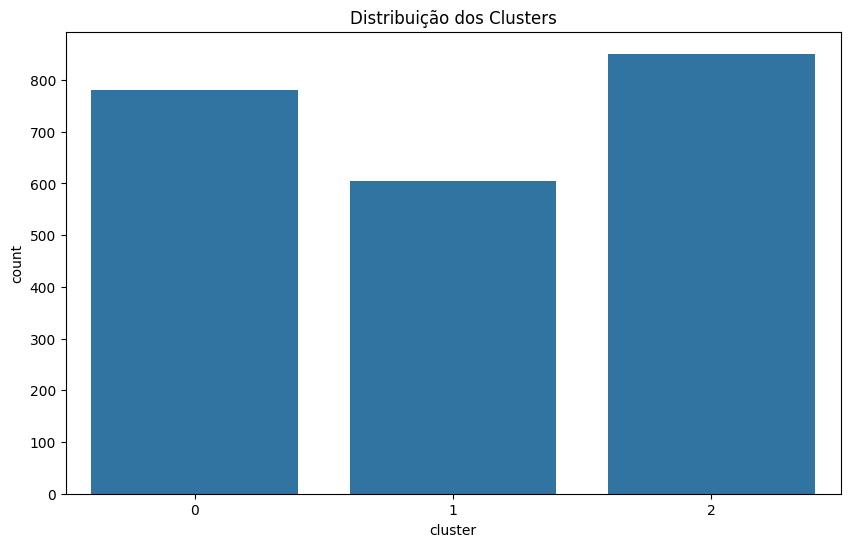

In [39]:
# Visualizar a distribuição dos clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribuição dos Clusters')
plt.show()


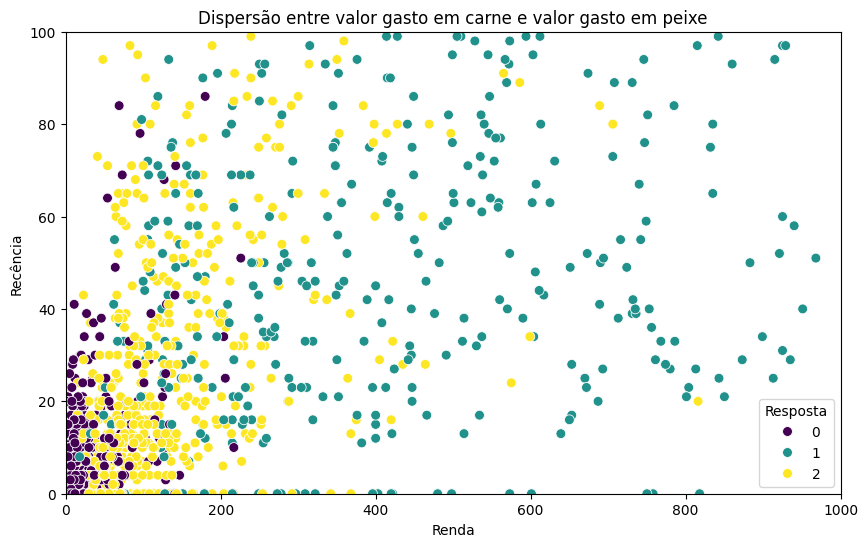

In [255]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntMeatProducts', y='MntFishProducts', hue='cluster', palette='viridis', data=df, s=50, alpha=1)
plt.title('Dispersão entre valor gasto em carne e valor gasto em peixe')
plt.xlabel('Renda')
plt.ylabel('Recência')
plt.legend(title='Resposta')
plt.xlim(0, 1000)
plt.ylim(0, 100)
plt.show()

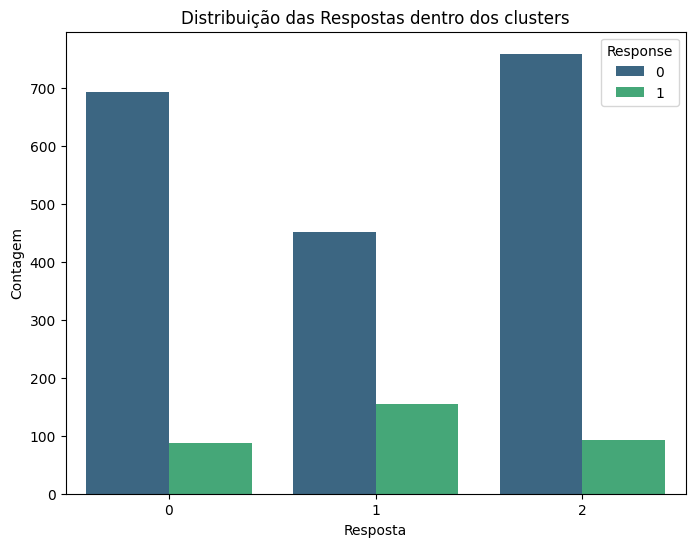

In [256]:
# 4. Distribuição das Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', hue='Response', data=df, palette='viridis')
plt.title('Distribuição das Respostas dentro dos clusters')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

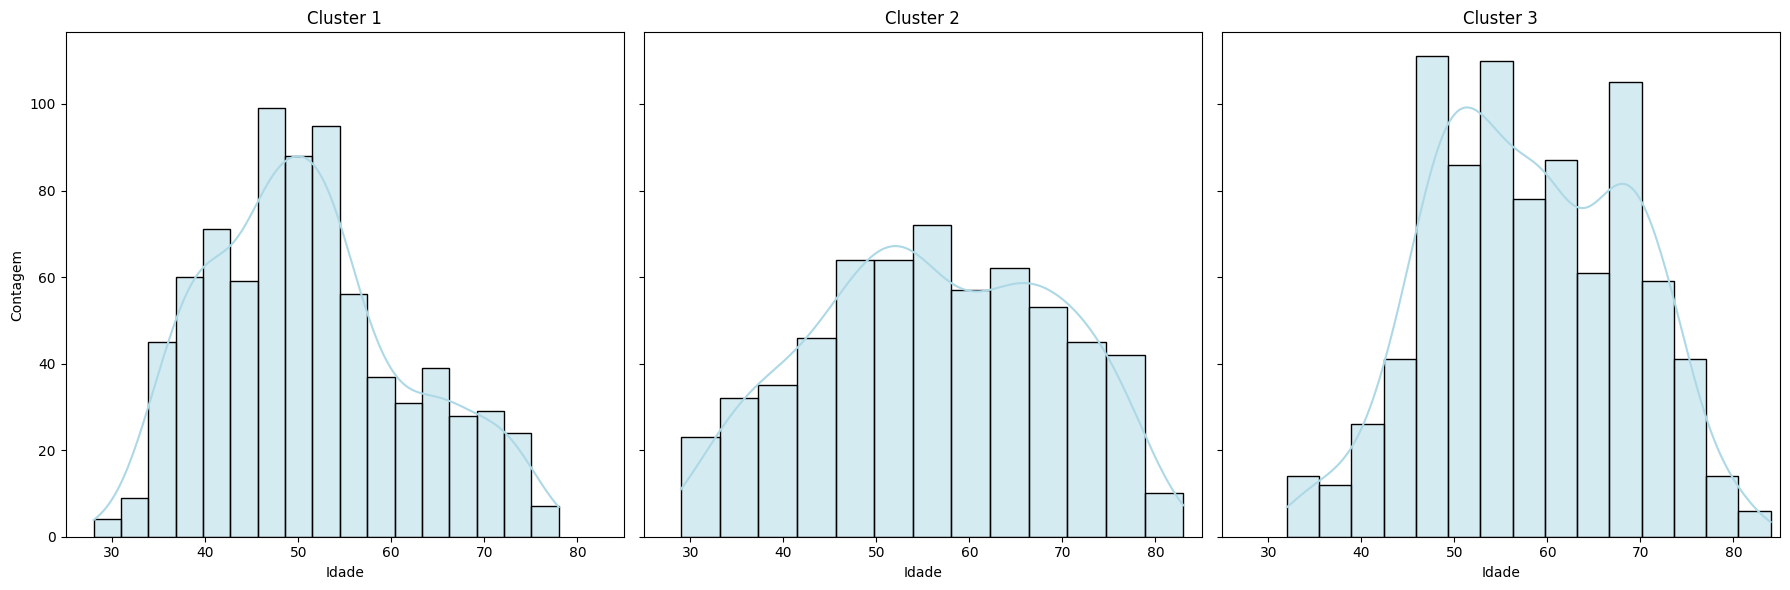

In [63]:
# Configurando a figura para três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Títulos dos gráficos
titles = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Cores para cada cluster

# Plotando a distribuição da idade para cada cluster
for i, ax in enumerate(axes):
    sns.histplot(data=df[df['cluster'] == i], x='idade', kde=True, ax=ax, color='lightblue')
    ax.set_title(titles[i])
    ax.set_xlabel('Idade')
    ax.set_ylabel('Contagem')
    ax.set_xlim(25, 85)

# Ajustando o layout
plt.tight_layout()
plt.show()

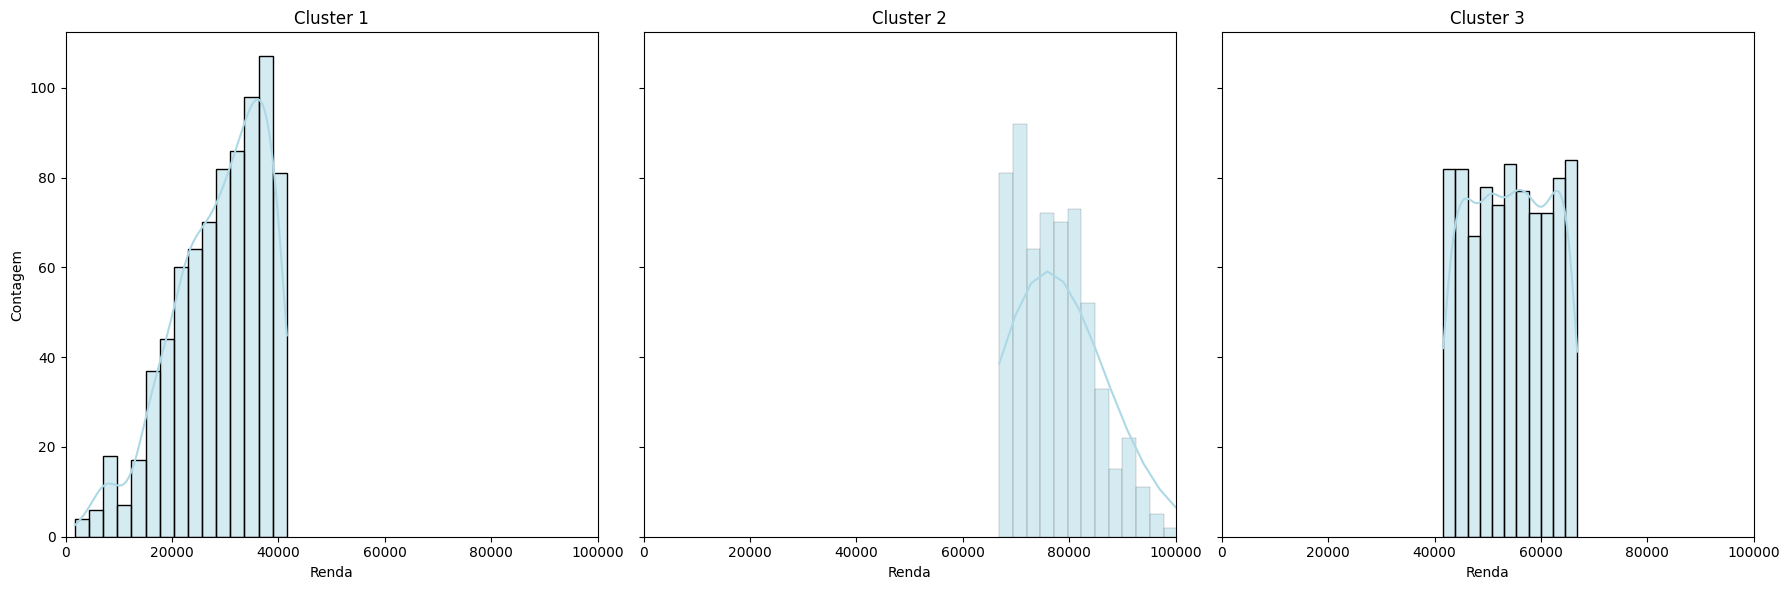

In [269]:
# Configurando a figura para três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Títulos dos gráficos
titles = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Cores para cada cluster

# Plotando a distribuição da idade para cada cluster
for i, ax in enumerate(axes):
    sns.histplot(data=df[df['cluster'] == i], x='Income', kde=True, ax=ax, color='lightblue')
    ax.set_title(titles[i])
    ax.set_xlabel('Renda')
    ax.set_ylabel('Contagem')
    ax.set_xlim(0, 100000)

# Ajustando o layout
plt.tight_layout()
plt.show()

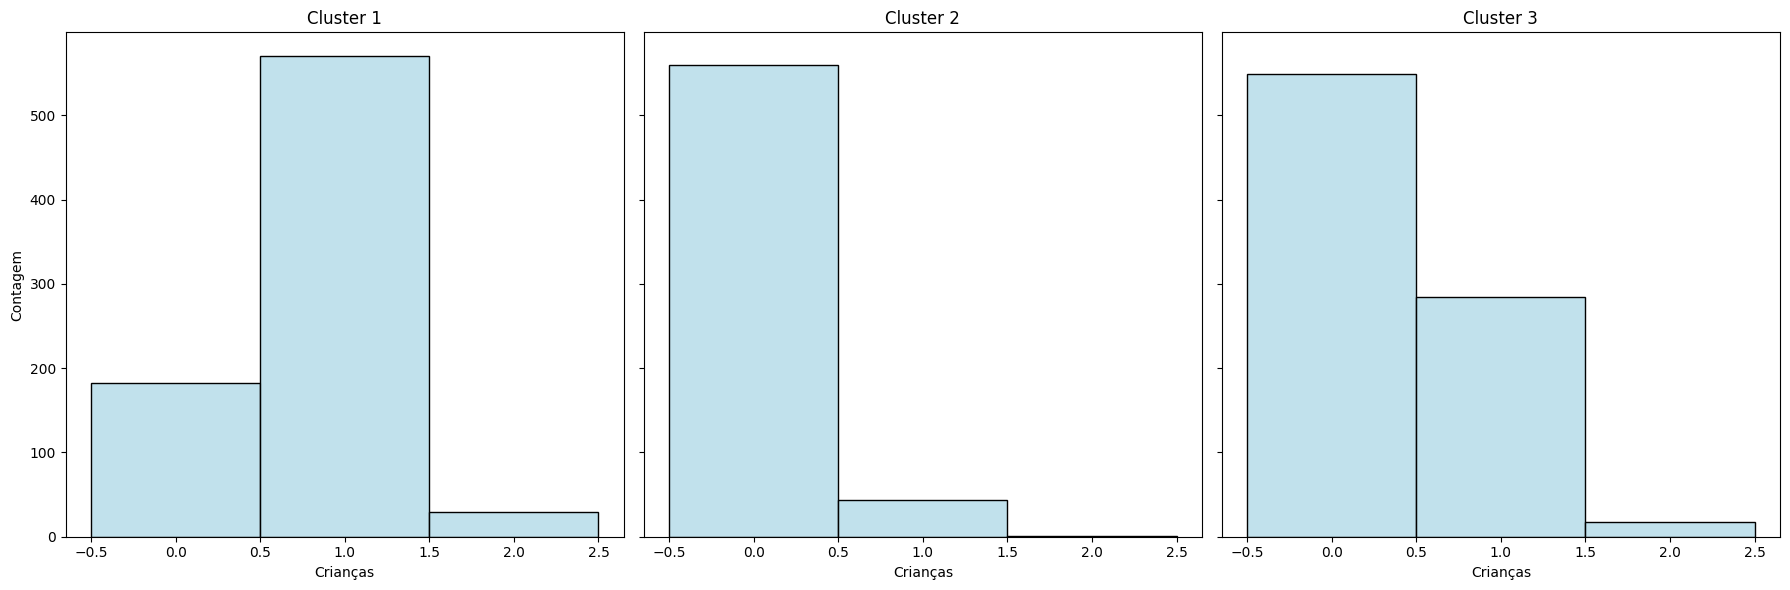

In [270]:
# Configurando a figura para três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Títulos dos gráficos
titles = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Cores para cada cluster

# Plotando a distribuição da idade para cada cluster
for i, ax in enumerate(axes):
    sns.histplot(data=df[df['cluster'] == i], x='Kidhome', ax=ax, color='lightblue')
    ax.set_title(titles[i])
    ax.set_xlabel('Crianças')
    ax.set_ylabel('Contagem')

# Ajustando o layout
plt.tight_layout()
plt.show()

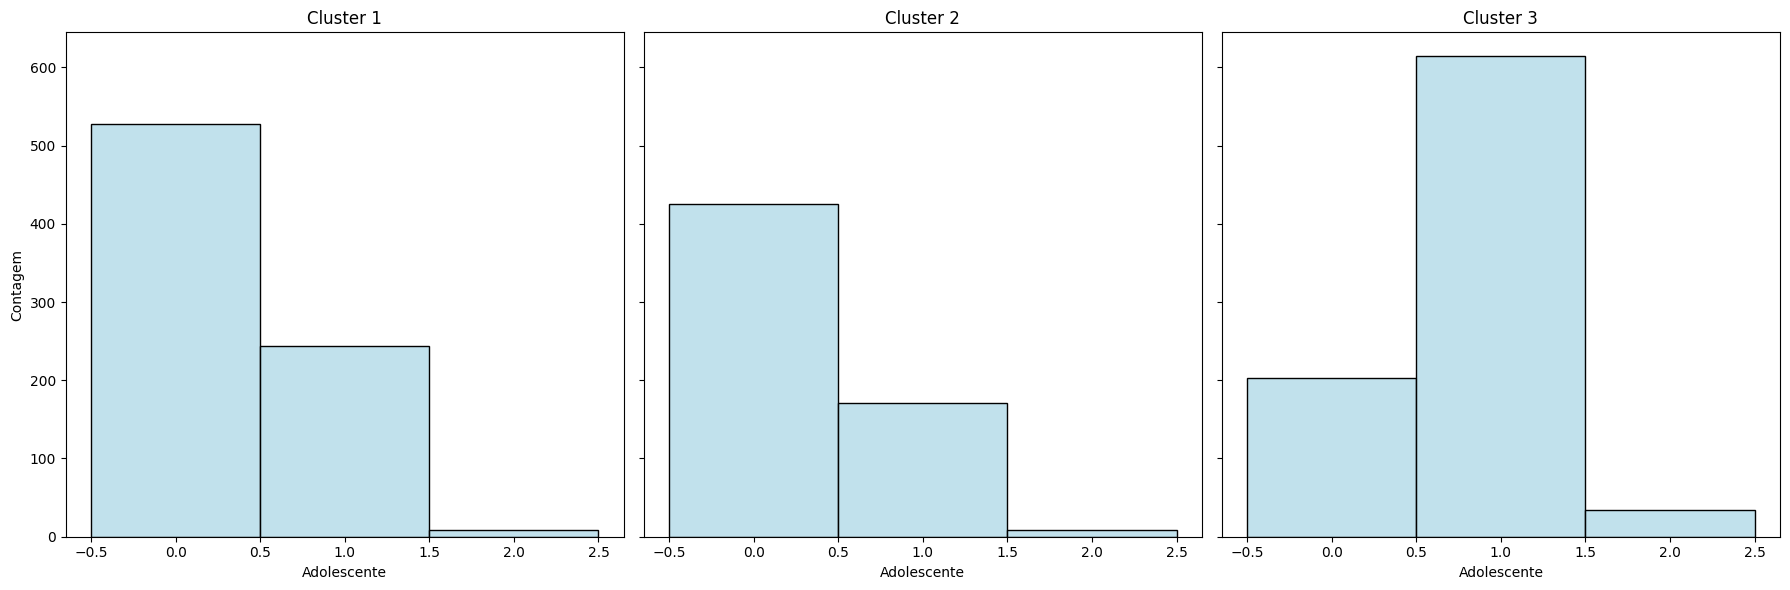

In [271]:
# Configurando a figura para três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Títulos dos gráficos
titles = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Cores para cada cluster

# Plotando a distribuição da idade para cada cluster
for i, ax in enumerate(axes):
    sns.histplot(data=df[df['cluster'] == i], x='Teenhome', ax=ax, color='lightblue')
    ax.set_title(titles[i])
    ax.set_xlabel('Adolescente')
    ax.set_ylabel('Contagem')

# Ajustando o layout
plt.tight_layout()
plt.show()

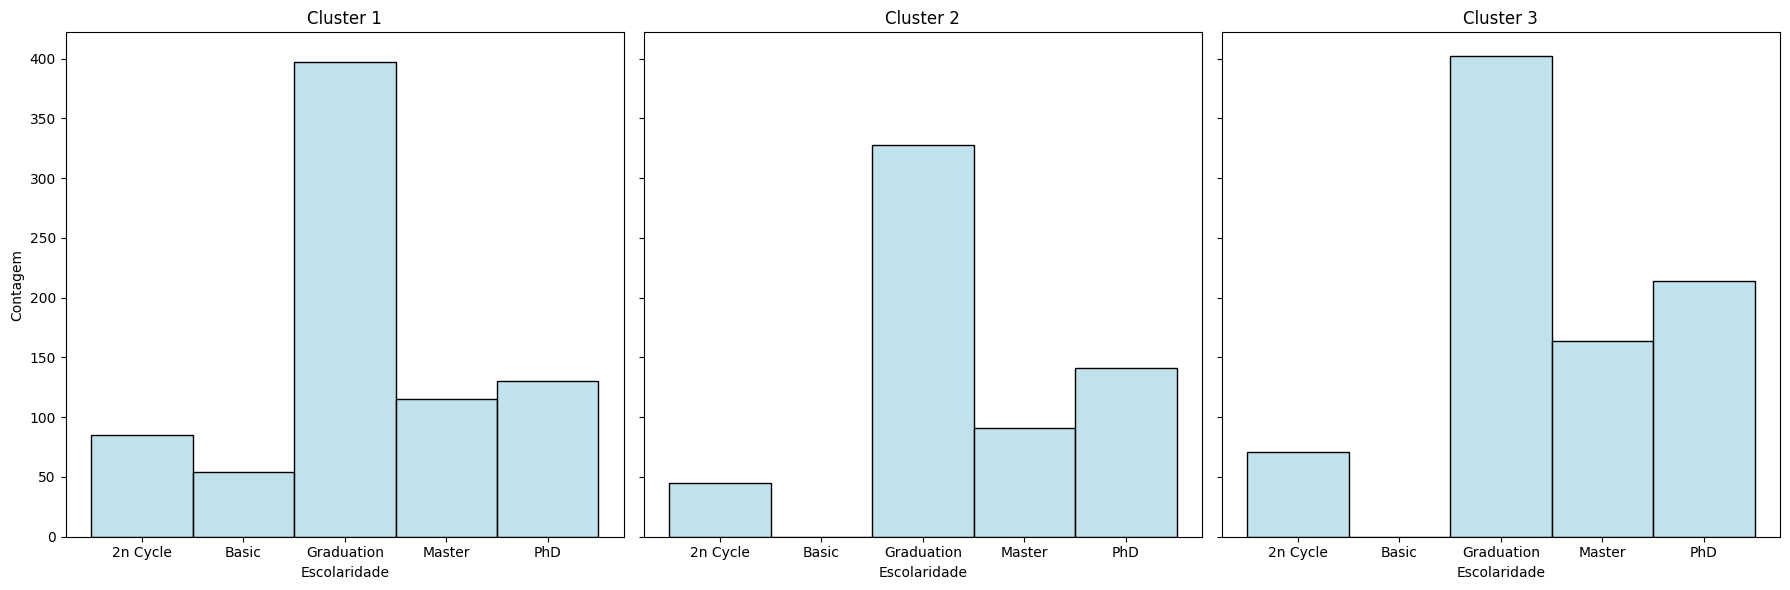

In [272]:
# Configurando a figura para três gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Títulos dos gráficos
titles = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Cores para cada cluster

# Plotando a distribuição da idade para cada cluster
for i, ax in enumerate(axes):
    sns.histplot(data=df[df['cluster'] == i], x='Education', ax=ax, color='lightblue')
    ax.set_title(titles[i])
    ax.set_xlabel('Escolaridade')
    ax.set_ylabel('Contagem')

# Ajustando o layout
plt.tight_layout()
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2237 non-null   int64   
 1   Year_Birth           2237 non-null   int64   
 2   Education            2237 non-null   category
 3   Marital_Status       2237 non-null   category
 4   Income               2237 non-null   float64 
 5   Kidhome              2237 non-null   category
 6   Teenhome             2237 non-null   category
 7   Recency              2237 non-null   int64   
 8   MntWines             2237 non-null   int64   
 9   MntFruits            2237 non-null   int64   
 10  MntMeatProducts      2237 non-null   int64   
 11  MntFishProducts      2237 non-null   int64   
 12  MntSweetProducts     2237 non-null   int64   
 13  MntGoldProds         2237 non-null   int64   
 14  NumDealsPurchases    2237 non-null   int64   
 15  NumWebPurchases      


**Understanding cluster behavior**

* 1st Cluster: Lower-income individuals, who consequently buy fewer products overall, shop with discounts, and frequently visit the website, where they make purchases. This profile includes younger individuals, often with children or teens.

* 2nd Cluster: Higher-income individuals who buy more across all product categories, but tend not to use discount coupons. This group is composed of middle-aged adults, generally without children, who are the ones most likely to have bought during the campaign.

* 3rd Cluster: People with more income than Cluster 1 but less than Cluster 2. They seem to take advantage of opportunities and buy with discounts more than the other two groups, have teenage children, and are older.

<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Statistical Modeling
</div>

#### **To create the best model possible, we will explore three modeling techniques: Decision Tree, LightGBM, and CatBoost.**

* **Decision Tree: Besides being a classic statistical model, the Decision Tree is also very powerful for interpreting variables through graphical analyses.**

* **LightGBM: Related to other popular boosting models, LightGBM offers the strength of a boosting model with the added advantage of being less computationally demanding.**

* **CatBoost: A model designed for better performance with categorical variables; like LightGBM, it’s a boosting model.**

**Given the imbalance between those who purchased and those who did not, we’ll use SMOTE to balance the data. This technique generates new sample observations using the KNN technique.**

**Separating the response variable and removing columns that won’t be used.**

In [69]:
X = df.drop(columns=['Response', 'ID'])
y = df['Response']

**creating dummy variables**

In [70]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [71]:
X_encoded.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Kidhome_2,Teenhome_1,Teenhome_2,AcceptedCmp3_1,AcceptedCmp4_1,AcceptedCmp5_1,AcceptedCmp1_1,AcceptedCmp2_1,Complain_1,"faixas_idade_(64.0, 84.0]"
0,1957,58138.0,58,635,88,546,172,88,88,3,...,False,False,False,False,False,False,False,False,False,True
1,1954,46344.0,38,11,1,6,2,1,6,2,...,False,True,False,False,False,False,False,False,False,True
2,1965,71613.0,26,426,49,127,111,21,42,1,...,False,False,False,False,False,False,False,False,False,False
3,1984,26646.0,26,11,4,20,10,3,5,2,...,False,False,False,False,False,False,False,False,False,False
4,1981,58293.0,94,173,43,118,46,27,15,5,...,False,False,False,False,False,False,False,False,False,False


**converting the y variable to numeric**

In [72]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

**splitting into train and test sets**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

**Applying SMOTE to balance the dataset**

In [74]:
sm = SMOTE(random_state=2)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

#### **Without performing feature selection**

**Decision Tree**

In [75]:
clf = DecisionTreeClassifier(random_state=42)

In [76]:
cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Scores de cross-validation: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Scores de cross-validation: [0.80483271 0.8866171  0.90148699 0.91078067 0.90520446]
Mean cross-validation score: 0.8817843866171005


In [77]:
clf.fit(X_resampled, y_resampled)


DecisionTreeClassifier(random_state=42)

In [78]:
y_pred = clf.predict(X_test)

In [79]:
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação no conjunto de teste:\n", classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

Acurácia no conjunto de teste: 0.8139880952380952

Relatório de Classificação no conjunto de teste:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       558
           1       0.46      0.54      0.49       114

    accuracy                           0.81       672
   macro avg       0.68      0.70      0.69       672
weighted avg       0.83      0.81      0.82       672



In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks = max(tpr - fpr)

print(f"Kolmogorov-Smirnov (KS) Score: {ks}")

Kolmogorov-Smirnov (KS) Score: 0.4060554612337295


<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

**LightGBM**

**removing special characters**

In [235]:
X_resampled.columns = X_resampled.columns.str.replace('[^\w]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[^\w]', '', regex=True)

In [236]:
lgb_train = lgb.Dataset(X_resampled, label=y_resampled)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)



**The LightGBM algorithm uses several hyperparameters; here’s an explanation of some of them:**

* boosting_type: This is the boosting method used. The default, 'gbdt', uses sequential decision trees to build the model.

* objective: Defines the model's objective, in our case, binary classification, so we use 'binary'.

* metric: The evaluation metric for the model. We chose binary_logloss, where lower values indicate better model performance.

* num_leaves: This refers to the maximum number of leaves in the decision tree. We chose 31 to create a complex tree while avoiding overfitting.

* learning_rate: Sets the rate at which each tree contributes to the final model. A smaller choice yields better results but requires more iterations to converge.

* feature_fraction: Percentage of variables used in each tree. Using less than 100% helps avoid overfitting; here, we used 0.9.

In [237]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [238]:
num_round = 100 
model = lgb.train(params, lgb_train, num_boost_round=num_round, valid_sets=[lgb_test])

[LightGBM] [Info] Number of positive: 1345, number of negative: 1345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1741
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [239]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [240]:

y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_binary = (y_pred >= 0.5).astype(int)

In [241]:
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred_binary))
print("\nRelatório de Classificação no conjunto de teste:\n", classification_report(y_test, y_pred_binary, target_names=[str(cls) for cls in le.classes_]))

Acurácia no conjunto de teste: 0.8839285714285714

Relatório de Classificação no conjunto de teste:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       558
           1       0.66      0.65      0.65       114

    accuracy                           0.88       672
   macro avg       0.79      0.79      0.79       672
weighted avg       0.88      0.88      0.88       672



In [242]:
ks = max(tpr - fpr)

print(f"Kolmogorov-Smirnov (KS) Score: {ks}")

Kolmogorov-Smirnov (KS) Score: 0.6677042067534428


                  Feature  Importance
2                 Recency         332
5         MntMeatProducts         273
1                  Income         258
8            MntGoldProds         203
12      NumStorePurchases         199
13      NumWebVisitsMonth         146
3                MntWines         145
7        MntSweetProducts         135
19   Education_Graduation         125
6         MntFishProducts         116
21          Education_PhD         101
4               MntFruits          93
20       Education_Master          84
16                  idade          80
11    NumCatalogPurchases          78
28         AcceptedCmp4_1          68
10        NumWebPurchases          63
22  Marital_Status_Casado          61
23              Kidhome_1          61
30         AcceptedCmp1_1          61
27         AcceptedCmp3_1          59
29         AcceptedCmp5_1          57
0              Year_Birth          54
33    faixas_idade_640840          54
31         AcceptedCmp2_1          42
25          

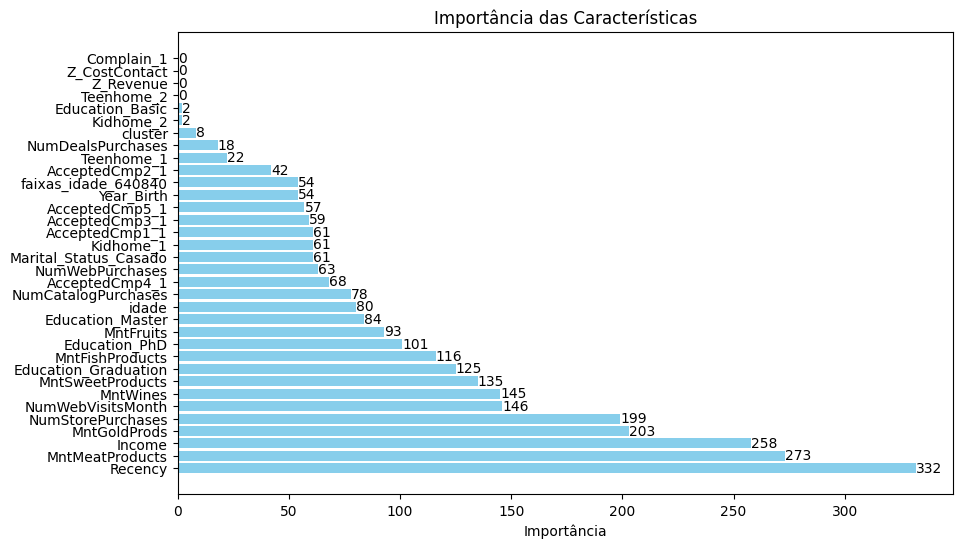

In [246]:
feature_importances = model.feature_importance(importance_type='split')  # ou 'gain'
features = X_test.columns
df_importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

df_importances_sorted = df_importances.sort_values(by='Importance', ascending=False)
print(df_importances_sorted)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_importances_sorted['Feature'], df_importances_sorted['Importance'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importância')
plt.title('Importância das Características')
plt.show()

<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

**CatBoost**

In [220]:
categorical_features = [col for col in X_resampled.columns if X_resampled[col].dtype == 'object']

In [221]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,        
    depth=6,                  
    cat_features=categorical_features, 
    eval_metric='AUC',        
    random_state=42
)

In [222]:
model.fit(X_resampled, y_resampled, eval_set=(X_test, y_test), verbose=200)

0:	test: 0.7472175	best: 0.7472175 (0)	total: 3.09ms	remaining: 3.09s
200:	test: 0.9013708	best: 0.9023140 (135)	total: 1.16s	remaining: 4.6s
400:	test: 0.9042791	best: 0.9042791 (400)	total: 2.29s	remaining: 3.42s
600:	test: 0.9025184	best: 0.9042791 (400)	total: 3.25s	remaining: 2.16s
800:	test: 0.9019996	best: 0.9042791 (400)	total: 3.81s	remaining: 946ms
999:	test: 0.9019367	best: 0.9042791 (400)	total: 4.4s	remaining: 0us

bestTest = 0.9042790668
bestIteration = 400

Shrink model to first 401 iterations.


In [223]:
y_pred = model.predict(X_test)

print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação no conjunto de teste:\n", classification_report(y_test, y_pred))

Acurácia no conjunto de teste: 0.8794642857142857

Relatório de Classificação no conjunto de teste:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       558
           1       0.67      0.58      0.62       114

    accuracy                           0.88       672
   macro avg       0.79      0.76      0.77       672
weighted avg       0.87      0.88      0.88       672



In [224]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks = max(tpr - fpr)

print(f"Kolmogorov-Smirnov (KS) Score: {ks}")

Kolmogorov-Smirnov (KS) Score: 0.5198075834748161


<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

#### **Performing Feature Selection**

In [194]:
params = {
   'objective': 'binary',
   'boosting_type': 'gbdt',
   'metric': 'binary_logloss',
   'num_leaves': 31,
   'learning_rate': 0.05,
   'feature_fraction': 0.9
}

In [195]:
lgb_train = lgb.Dataset(X_resampled, y_resampled)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [196]:
model = lgb.train(params, lgb_train, num_boost_round=100)

[LightGBM] [Info] Number of positive: 1345, number of negative: 1345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1741
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [197]:
feature_importances = model.feature_importance()
feature_names = X_train.columns

In [200]:
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
top_n = 10
selected_features = importance_df['feature'].head(top_n).tolist()
print(selected_features)

['Recency', 'MntMeatProducts', 'Income', 'MntGoldProds', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntWines', 'MntSweetProducts', 'Education_Graduation', 'MntFishProducts']


In [201]:
X_train_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]

<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

**Decision Tree**

In [202]:
clf = DecisionTreeClassifier(random_state=42)

In [203]:
cv_scores = cross_val_score(clf, X_train_selected, y_resampled, cv=5, scoring='accuracy')
print(f"Scores de cross-validation: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Scores de cross-validation: [0.81598513 0.83271375 0.85873606 0.85315985 0.84572491]
Mean cross-validation score: 0.8412639405204461


In [204]:
clf.fit(X_train_selected, y_resampled)


DecisionTreeClassifier(random_state=42)

In [205]:
y_pred = clf.predict(X_test_selected)

In [208]:
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação no conjunto de teste:\n", classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

Acurácia no conjunto de teste: 0.7797619047619048

Relatório de Classificação no conjunto de teste:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       558
           1       0.39      0.54      0.46       114

    accuracy                           0.78       672
   macro avg       0.65      0.69      0.66       672
weighted avg       0.81      0.78      0.79       672



In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks = max(tpr - fpr)

print(f"Kolmogorov-Smirnov (KS) Score: {ks}")

Kolmogorov-Smirnov (KS) Score: 0.37181663837011886


<div style="width: 100%; height: 20px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
</div>

**LightGBM**

removing special characters

In [210]:
X_train_selected.columns = X_train_selected.columns.str.replace('[^\w]', '', regex=True)
X_test_selected.columns = X_test_selected.columns.str.replace('[^\w]', '', regex=True)

In [211]:
lgb_train = lgb.Dataset(X_train_selected, label=y_resampled)
lgb_test = lgb.Dataset(X_test_selected, label=y_test, reference=lgb_train)


In [212]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [213]:
num_round = 100 
model = lgb.train(params, lgb_train, num_boost_round=num_round, valid_sets=[lgb_test])

[LightGBM] [Info] Number of positive: 1345, number of negative: 1345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1413
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [214]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [215]:
y_pred = model.predict(X_test_selected, num_iteration=model.best_iteration)
y_pred_binary = (y_pred >= 0.5).astype(int)

In [216]:
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred_binary))
print("\nRelatório de Classificação no conjunto de teste:\n", classification_report(y_test, y_pred_binary, target_names=[str(cls) for cls in le.classes_]))

Acurácia no conjunto de teste: 0.8348214285714286

Relatório de Classificação no conjunto de teste:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       558
           1       0.51      0.70      0.59       114

    accuracy                           0.83       672
   macro avg       0.72      0.78      0.74       672
weighted avg       0.86      0.83      0.84       672



In [217]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks = max(tpr - fpr)

print(f"Kolmogorov-Smirnov (KS) Score: {ks}")

Kolmogorov-Smirnov (KS) Score: 0.6072439162422185


**CatBoost**

In [115]:
categorical_features = [col for col in X_train_selected.columns if X_train_selected[col].dtype == 'object']

In [116]:
model = CatBoostClassifier(
    iterations=1000,      
    learning_rate=0.1,      
    depth=6,                
    cat_features=categorical_features, 
    eval_metric='AUC',        
    random_state=42
)

In [117]:
model.fit(X_train_selected, y_resampled, eval_set=(X_test_selected, y_test), verbose=200)

0:	test: 0.7466123	best: 0.7466123 (0)	total: 2.98ms	remaining: 2.97s
200:	test: 0.8311011	best: 0.8343237 (69)	total: 419ms	remaining: 1.66s
400:	test: 0.8311482	best: 0.8343237 (69)	total: 830ms	remaining: 1.24s
600:	test: 0.8287902	best: 0.8343237 (69)	total: 1.23s	remaining: 815ms
800:	test: 0.8285229	best: 0.8343237 (69)	total: 1.63s	remaining: 404ms
999:	test: 0.8290417	best: 0.8343237 (69)	total: 2.05s	remaining: 0us

bestTest = 0.8343237125
bestIteration = 69

Shrink model to first 70 iterations.


In [118]:
y_pred = model.predict(X_test_selected)

print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação no conjunto de teste:\n", classification_report(y_test, y_pred))

Acurácia no conjunto de teste: 0.8080357142857143

Relatório de Classificação no conjunto de teste:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       558
           1       0.46      0.72      0.56       114

    accuracy                           0.81       672
   macro avg       0.70      0.77      0.72       672
weighted avg       0.85      0.81      0.82       672



In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks = max(tpr - fpr)

print(f"Kolmogorov-Smirnov (KS) Score: {ks}")

Kolmogorov-Smirnov (KS) Score: 0.5454631201660064


<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Model Results
</div>

<!DOCTYPE html>
<html lang="pt">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Tabela de Resultados</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid #dddddd;
            text-align: center;
            padding: 8px;
        }
        th {
            background-color: #f2f2f2;
        }
        .centered {
            text-align: center;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th></th>
                <th colspan="3" class="centered">Sem seleção de variáveis</th>
                <th colspan="3" class="centered">Com seleção de variáveis</th>
            </tr>
            <tr>
                <th>Medidas</th>
                <th>Árvore</th>
                <th>LGBM</th>
                <th>Catboost</th>
                <th>Árvore</th>
                <th>LGBM</th>
                <th>Catboost</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Precisão</td>
                <td>0,46</td>
                <td>0,66</td>
                <td>0,67</td>
                <td>0,39</td>
                <td>0,51</td>
                <td>0,46</td>
            </tr>
            <tr>
                <td>Acurácia</td>
                <td>0,81</td>
                <td>0,88</td>
                <td>0,88</td>
                <td>0,78</td>
                <td>0,83</td>
                <td>0,81</td>
            </tr>
            <tr>
                <td>KS</td>
                <td>0,40</td>
                <td>0,66</td>
                <td>0,51</td>
                <td>0,37</td>
                <td>0,60</td>
                <td>0,54</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

**From the results table, we identify that the LightGBM model with all variables generally performs better than the others, especially in terms of accuracy, an important metric in our current scenario where we want to be precise in the next campaign, targeting a high-probability audience. It also ranks well on KS, which indicates the model's ability to distinguish between buyers and non-buyers, making it our model of choice.**

**It’s important to note that the chosen model includes nearly all variables from the original dataset for predictions. In a real scenario, if not all dataset observations have variables related to participation in previous campaigns, it would be essential to exclude these from the model training.**

<div style="width: 100%; height: 60px; background-color: #FF6F6F; color: white; text-align: center; line-height: 60px; border-radius: 15px; font-weight: bold;">
    Final Considerations
</div>

**Our next step is to score the company’s entire customer database to identify potential buyers as the target for the next campaign. We can also draw insights from cluster analysis, such as the fact that people in Cluster 2 tend to purchase more, so it would be a good idea to prioritize scoring for individuals in this cluster.**

**Another takeaway from the clusters is the potential to offer more discount coupons, especially to those in Clusters 1 and 3, to increase their engagement.**